In [53]:

import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance, to_graphviz


In [2]:
data = pd.read_csv('/home/abhishek/projects/Financialdataset/PS_20174392719_1491204439457_log.csv')

In [3]:
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
data.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [7]:
data['isFlaggedFraud'].unique()

array([0, 1])

In [10]:
data['isFraud'].unique()

array([0, 1])

In [15]:
dataFraud = data[data['isFraud']== 1 ]

In [16]:
dataFraud.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.0,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.0,9291619.62,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.00,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.0,2444985.19,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.00,1,0


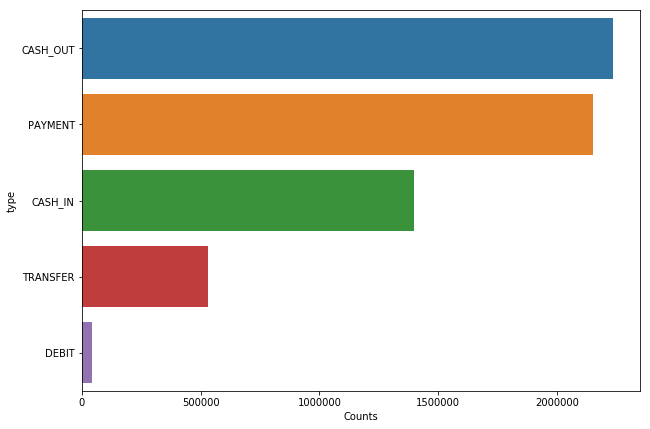

In [19]:
plt.figure(figsize = (10,7))
sns.barplot(data.type.value_counts().values,data.type.value_counts().index)
plt.xlabel("Counts")
plt.ylabel("type")
plt.show()

In [22]:
data[(data['isFraud']== 1) & (data['isFlaggedFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [23]:
data[(data['isFraud']== 1) & (data['isFlaggedFraud']==0)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.00,C339924917,6268.00,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.00,C667346055,102.00,9291619.62,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.00,C431687661,0.00,0.00,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.00,C716083600,0.00,2444985.19,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.00,C1136419747,0.00,0.00,1,0


In [45]:
y = data['isFraud']

In [46]:
factors = ['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [47]:
x = data[factors]

In [48]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()


In [49]:
x['type'] = labelencoder.fit_transform(x['type'])

/home/abhishek/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9839.64,170136.00,160296.36,0.00,0.00
1,1,3,1864.28,21249.00,19384.72,0.00,0.00
2,1,4,181.00,181.00,0.00,0.00,0.00
3,1,1,181.00,181.00,0.00,21182.00,0.00
4,1,3,11668.14,41554.00,29885.86,0.00,0.00
5,1,3,7817.71,53860.00,46042.29,0.00,0.00
6,1,3,7107.77,183195.00,176087.23,0.00,0.00
7,1,3,7861.64,176087.23,168225.59,0.00,0.00
8,1,3,4024.36,2671.00,0.00,0.00,0.00
9,1,2,5337.77,41720.00,36382.23,41898.00,40348.79


In [36]:
limit = len(x)

In [37]:
x.corr()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
step,1.000000,0.006635,0.022373,-0.010058,-0.010299,0.027665,0.025888
type,0.006635,1.000000,0.088419,-0.339760,-0.352758,-0.104679,-0.059364
amount,0.022373,0.088419,1.000000,-0.002762,-0.007861,0.294137,0.459304
oldbalanceOrg,-0.010058,-0.339760,-0.002762,1.000000,0.998803,0.066243,0.042029
newbalanceOrig,-0.010299,-0.352758,-0.007861,0.998803,1.000000,0.067812,0.041837
oldbalanceDest,0.027665,-0.104679,0.294137,0.066243,0.067812,1.000000,0.976569
newbalanceDest,0.025888,-0.059364,0.459304,0.042029,0.041837,0.976569,1.000000


(oldbalanceOrg, newbalanceOrig)   (oldbalanceDest,newbalanceDest) are highly correlated 

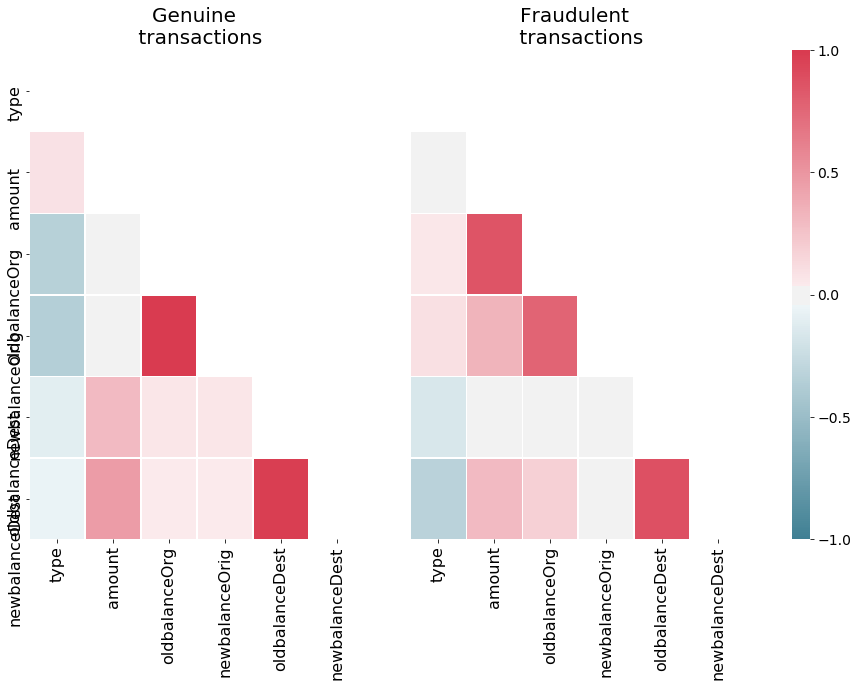

In [39]:
Xfraud = x.loc[y == 1] # update Xfraud & XnonFraud with cleaned data
XnonFraud = x.loc[y == 0]
                  
correlationNonFraud = XnonFraud.loc[:, x.columns != 'step'].corr()
mask = np.zeros_like(correlationNonFraud)
indices = np.triu_indices_from(correlationNonFraud)
mask[indices] = True

grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws,figsize = (14, 9))

cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationNonFraud, ax = ax1, vmin = -1, vmax = 1,cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16); 
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16); 
ax1.set_title('Genuine \n transactions', size = 20)

correlationFraud = Xfraud.loc[:, x.columns != 'step'].corr()
ax2 = sns.heatmap(correlationFraud, vmin = -1, vmax = 1, cmap = cmap, ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False,cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical','ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16); 
ax2.set_title('Fraudulent \n transactions', size = 20);

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 14);

In [51]:
from sklearn.model_selection import train_test_split
randomState = 5
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2,random_state = randomState)

In [57]:
clf = XGBClassifier(max_depth = 3)
probabilities = clf.fit(trainX, trainY).predict_proba(testX)
print('AUPRC = {}'.format(average_precision_score(testY,probabilities[:, 1])))

AUPRC = 0.853731570411


In [63]:
clf.score(testX,testY)

0.9844757348387928

In [61]:
from sklearn.ensemble  import RandomForestClassifier
clf22 = RandomForestClassifier(n_estimators=100, max_depth=3,random_state=0)
clf22.fit(trainX, trainY).predict_proba(testX)

clf22.score(testX,testY)

[0.25826791 0.09767325 0.1355648  0.24228883 0.03611497 0.03706201
 0.19302822]


0.9988275270250305

In [69]:
print trainX.columns.tolist()
print(clf22.feature_importances_)

['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
[0.25826791 0.09767325 0.1355648  0.24228883 0.03611497 0.03706201
 0.19302822]


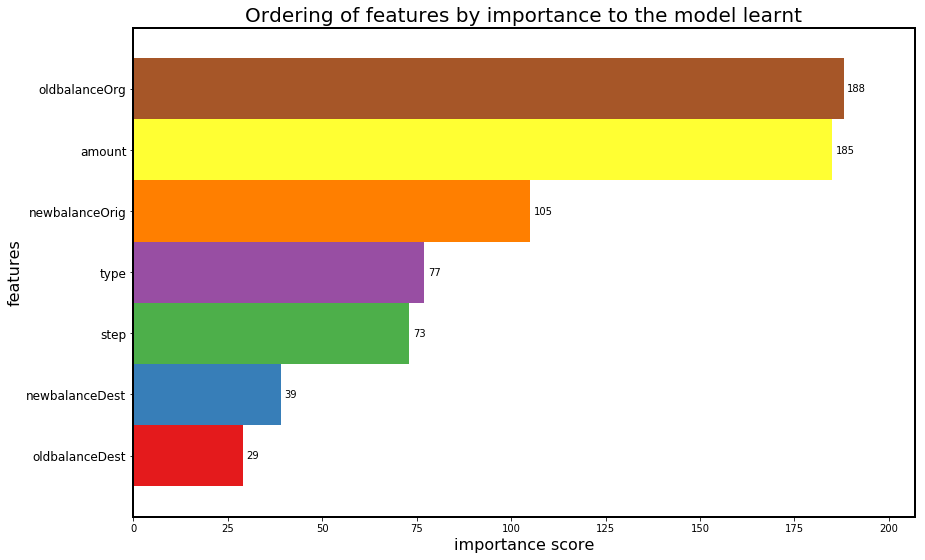

In [67]:
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(clf, height = 1, color = colours, grid = False,ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);

The important features below as per Random forest 

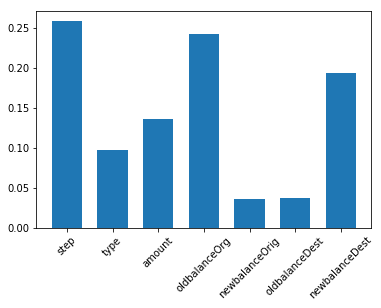

In [78]:
feat_importances = clf22.feature_importances_
feat_importances 
width = 1/1.5
plt.bar(trainX.columns.tolist(),feat_importances,width)
plt.xticks(rotation = 45)
plt.show()

to check tree of XGB

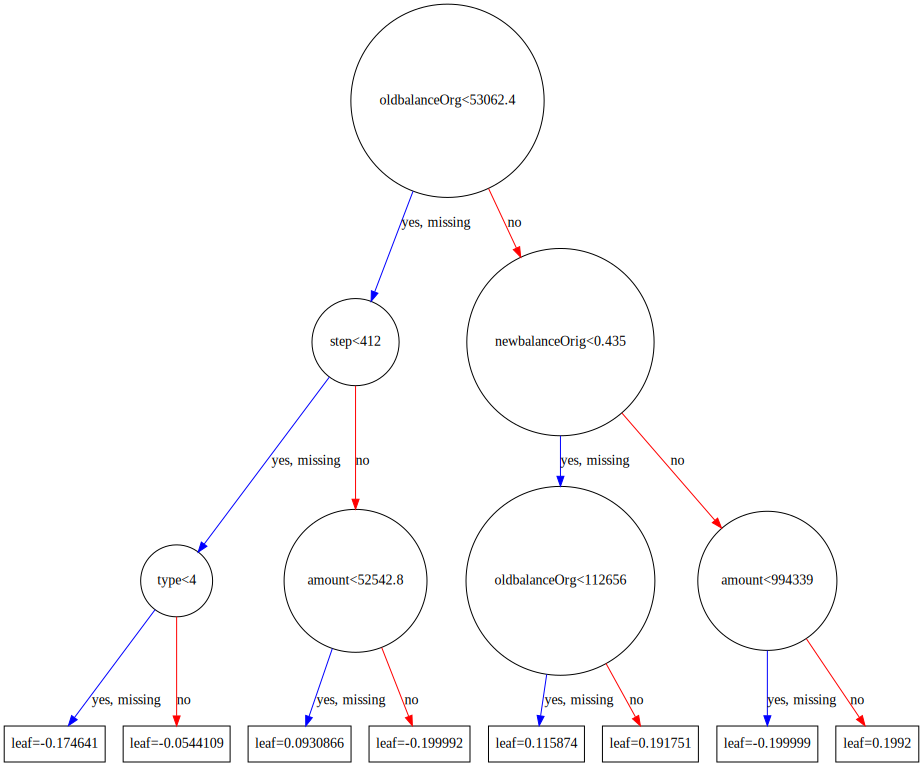

In [81]:
to_graphviz(clf)

to check tree of Random forest

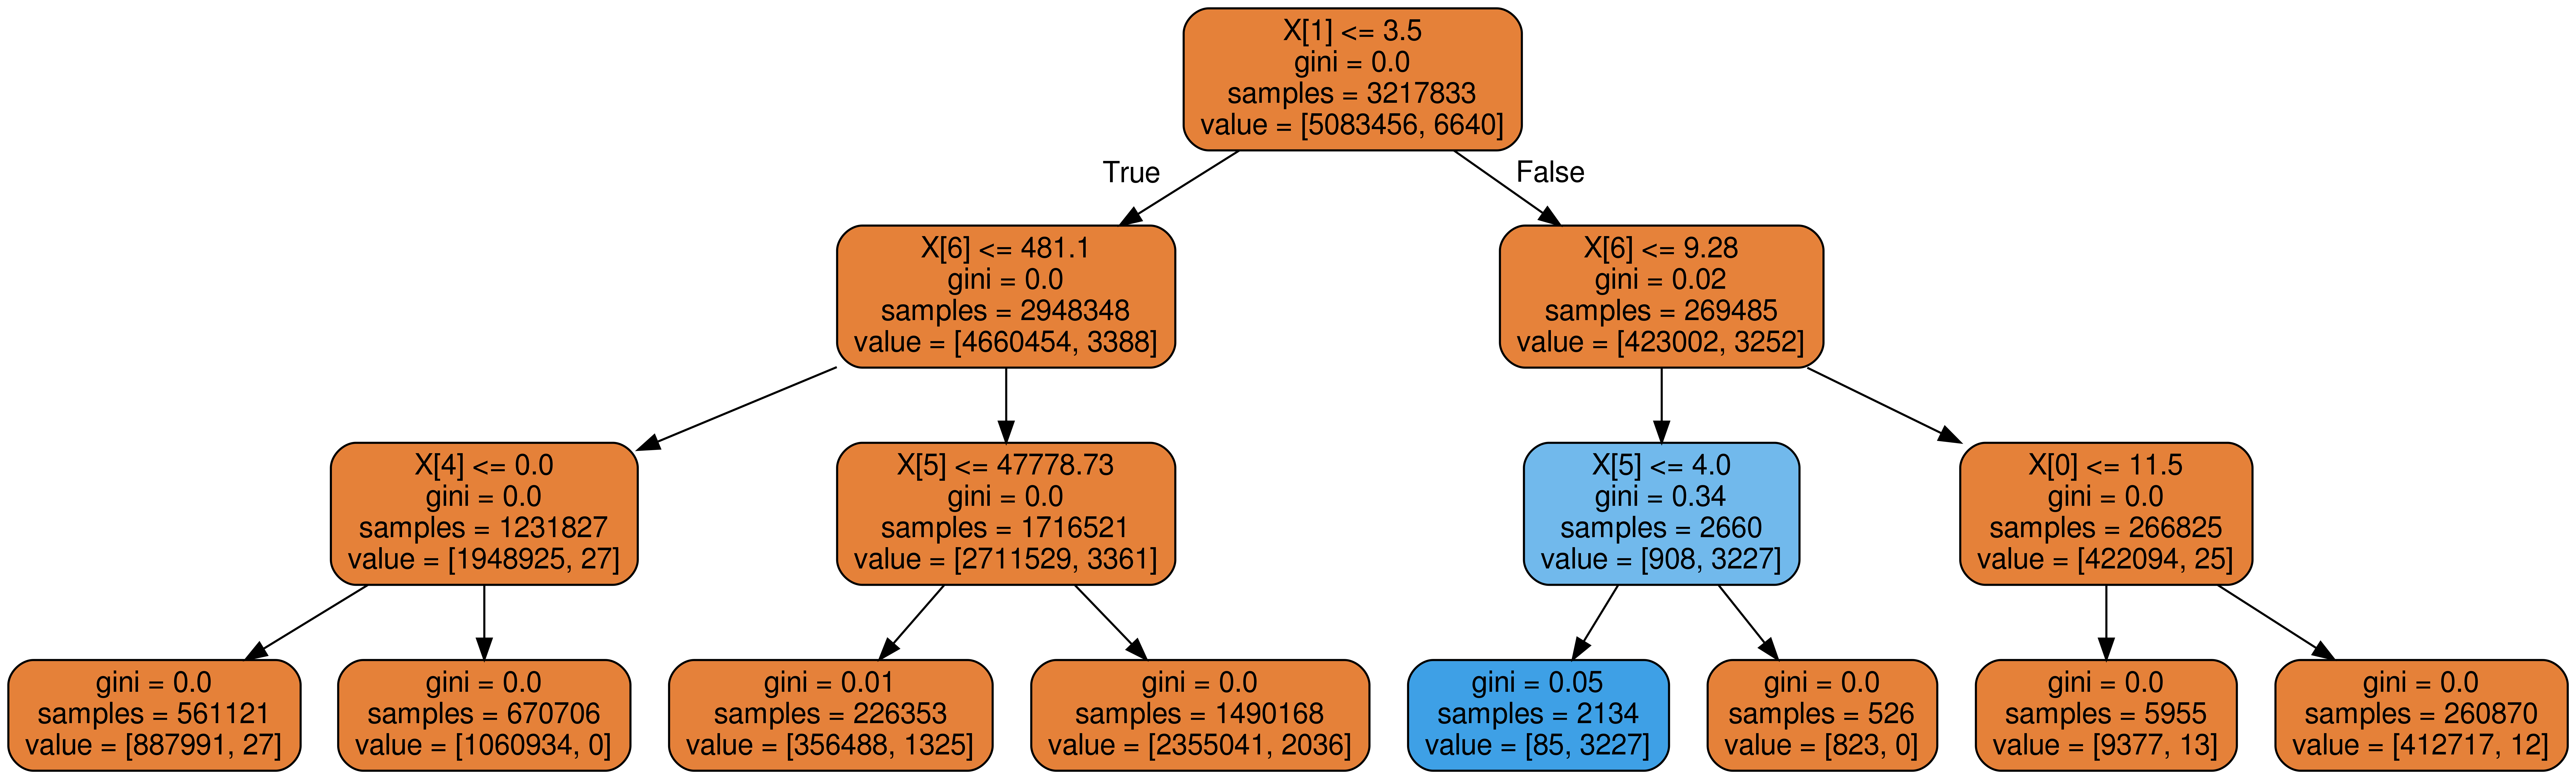

In [84]:
from sklearn.tree import export_graphviz
estimator = clf22.estimators_[6]
export_graphviz(estimator, out_file='tree.dot',rounded = True, proportion = False,precision = 2, filled = True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'tree.png')

But Both Random forest , XGBoost do well in this data 